In [2]:
import sys
import os
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
import geopandas as gpd
import regionmask
import rioxarray
from shapely.geometry import mapping, Point, Polygon
from xarrayutils.utils import linear_trend, xr_linregress

In [4]:
# Define project repo path
inDirName = '/Users/smurugan9/research/aislens/aislens_emulation/'
# Data file paths
iceShelf_Amery_filepath = 'data/interim/Amery.nc' # Data containing regridded flux and SSH for 150 years

In [5]:
data = xr.open_dataset(inDirName + iceShelf_Amery_filepath)
flux = data.timeMonthly_avg_landIceFreshwaterFlux
ssh = data.timeMonthly_avg_ssh
lat = data.lat
lon = data.lon

In [15]:
flx_tmean = flux.mean('Time')
h_tmean = ssh.mean('Time')

In [19]:
flx_rgrs = xr_linregress(ssh, flux, dim='Time') # h = independent variable

In [23]:
flx_prd = flx_rgrs.slope*ssh + flx_rgrs.intercept
flx_prd = flx_prd.transpose('Time','y','x')

In [24]:
flx_ddrft = flux - flx_prd

In [26]:
flx_prd_ts = flx_prd.sum(['y','x'])
flx_ddrft_ts = flx_ddrft.sum(['y','x'])
flx_ts = flux.sum(['y','x'])

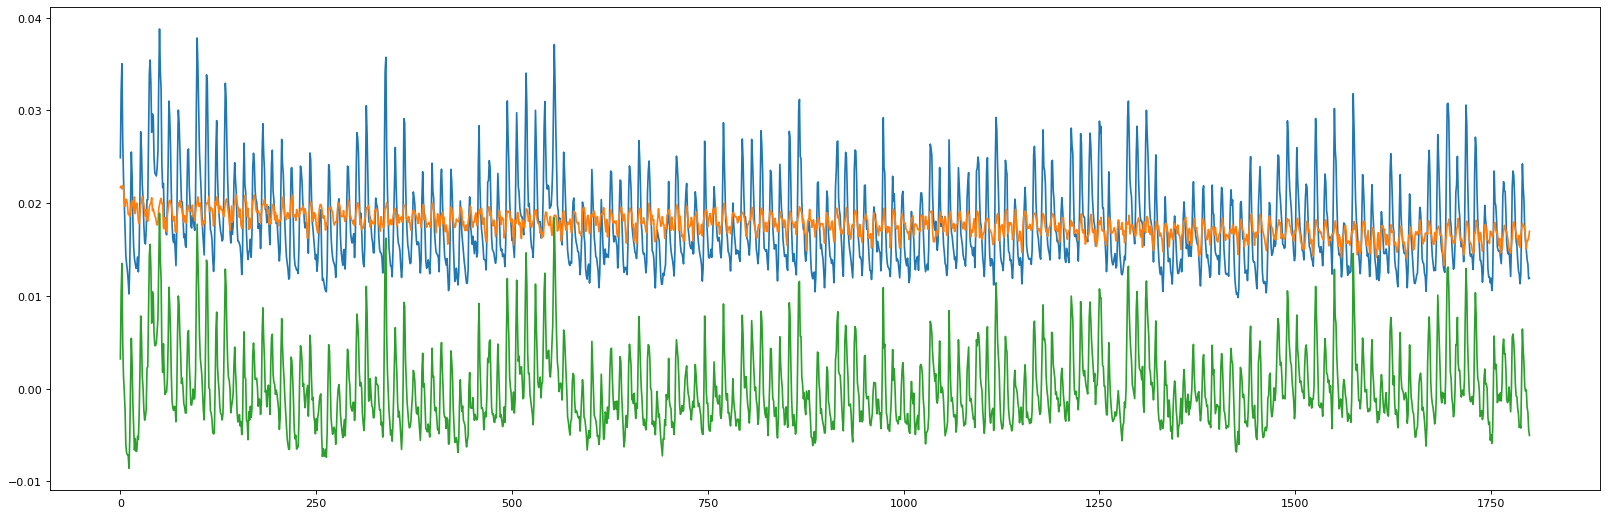

In [27]:
plt.figure(figsize=(25, 8), dpi=80)
plt.plot(flx_ts)
plt.plot(flx_prd_ts)
plt.plot(flx_ddrft_ts)